In [1]:
# Cell 1: Clear cache and reinstall from main branch
!pip cache purge
# Uninstall old package
!pip uninstall edge-gwas -y

# Remove any existing clone
!rm -rf ~/edge-gwas

# Clone fresh from GitHub
!cd ~ && git clone https://github.com/nicenzhou/edge-gwas.git

# Install in editable/development mode
!pip install -e ~/edge-gwas

# Verify installation
!python -c "from edge_gwas.utils import calculate_pca_plink; print('✓ Installation successful!')"

Files removed: 0
Found existing installation: edge-gwas 0.1.1
Uninstalling edge-gwas-0.1.1:
  Successfully uninstalled edge-gwas-0.1.1
Cloning into 'edge-gwas'...
remote: Enumerating objects: 1099, done.
remote: Counting objects: 100% (310/310), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 1099 (delta 271), reused 187 (delta 187), pack-reused 789 (from 1)
Receiving objects: 100% (1099/1099), 1.54 MiB | 3.92 MiB/s, done.
Resolving deltas: 100% (695/695), done.
Obtaining file:///Users/nicen/edge-gwas
  Preparing metadata (setup.py) ... done
  Running setup.py develop for edge-gwas
✓ Installation successful!


In [2]:
# Cell 2: Install and validate the outside tools
# Install external tools (PLINK2, GCTA, R packages)
!echo -e "yes\n3\n2" | edge-gwas-install-tools

# Verify installation
!edge-gwas-check-tools


EDGE-GWAS External Tools Installer

This will install the following tools:
  1. PLINK2 - For PCA calculation
  2. GCTA - For GRM calculation
  3. R packages (GENESIS, SNPRelate, gdsfmt) - For PC-AiR

Do you want to proceed? [y/N]: 
Starting installation...


Installing external tools for EDGE-GWAS...

System: Darwin
Architecture: x86_64
Installation directory: /Users/nicen/.local/bin

Installing PLINK2...

Detected system: macOS (x86_64)

Available PLINK2 versions for macOS:
  1. ARM64 (M1/M2/M3 Macs - native, recommended for Apple Silicon)
  2. AVX2 (Intel Macs with AVX2 support - fastest for Intel)
  3. Standard (Intel Macs - compatible with all)

Recommended: Option 2 (AVX2) if your Intel Mac supports it, otherwise 3

Select version [1/2/3, default=2]:   Selected: PLINK2 macOS standard
    ✓ Downloaded and verified (2,045,164 bytes)
  Extracting...
  ✓ PLINK2 installed successfully: PLINK v2.0.0-a.7 64-bit (5 Dec 2025)

Installing GCTA...

Detected system: macOS (x86_64)

Available

In [3]:
# Cell 3: Load the functions from package
from edge_gwas import *
import pandas as pd
from edge_gwas import EDGEAnalysis
from edge_gwas.utils import *
from edge_gwas.visualize import manhattan_plot, qq_plot, plot_alpha_distribution
from IPython.display import Image, display

In [4]:
# Cell 4: Download test files to default 'tests' directory
download_test_files(version='main',overwrite=True)

INFO:edge_gwas.io_handlers:Downloading test files to tests


⬇ Downloading: test.bed... 

INFO:edge_gwas.io_handlers:Downloaded test.bed from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bed
INFO:edge_gwas.io_handlers:Downloaded test.bim from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.bim


✓ (0.94 MB)
⬇ Downloading: test.bim... ✓ (0.03 MB)
⬇ Downloading: test.fam... 

INFO:edge_gwas.io_handlers:Downloaded test.fam from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.fam
INFO:edge_gwas.io_handlers:Downloaded test.phen from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.phen


✓ (0.07 MB)
⬇ Downloading: test.phen... ✓ (0.09 MB)
⬇ Downloading: test.vcf... 

INFO:edge_gwas.io_handlers:Downloaded test.vcf from https://raw.githubusercontent.com/nicenzhou/edge-gwas/main/tests/test.vcf


✓ (0.23 MB)

Summary:
  ✓ Downloaded: 5
  ⊙ Skipped: 0
  ✗ Failed: 0


{'downloaded': ['test.bed', 'test.bim', 'test.fam', 'test.phen', 'test.vcf'],
 'skipped': [],
 'failed': []}

In [5]:
# Cell 5: Load data
geno, info = load_plink_data('tests/test.bed', 'tests/test.bim', 'tests/test.fam')
geno_vcf, info_vcf = load_vcf_data('tests/test.vcf')

INFO:edge_gwas.utils:Loading PLINK data from tests/test.bed
Mapping files: 100%|██████████████████████████████| 3/3 [00:00<00:00, 33.88it/s]
INFO:edge_gwas.utils:Loaded 3925 samples and 1000 variants
INFO:edge_gwas.utils:Loading VCF data from tests/test.vcf
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.ASN_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AMR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.AFR_AF"
[W::bcf_hrec_check] Invalid tag name: "1000Genomes.EUR_AF"
[W::bcf_hrec_check] Invalid tag name: "UCSC.Alignability/Uniqueness"
INFO:edge_gwas.utils:Loaded 1 samples and 902 variants
INFO:edge_gwas.utils:Using dosages (DS field)


In [6]:
# Cell 6: PCA on genotyped calls/raw genotyped data using sklearn, plink, PC-AiR
pca_df_sklearn = calculate_pca_sklearn(geno, n_pcs=10)
pca_df_plink = calculate_pca_plink('tests/test', n_pcs=10)
pca_df_pcair = calculate_pca_pcair('tests/test', n_pcs=10)

INFO:edge_gwas.utils:Calculating 10 principal components using scikit-learn...
INFO:edge_gwas.utils:Explained variance ratio: [0.0181761  0.01467461 0.01316959 0.01167631 0.01104183]
INFO:edge_gwas.utils:Total variance explained by 10 PCs: 0.117
INFO:edge_gwas.utils:PCA complete for 3925 samples
INFO:edge_gwas.utils:Calculating 10 PCs using PLINK2 (exact method)...
INFO:edge_gwas.utils:Input format: bfile
INFO:edge_gwas.utils:MAF threshold: 0.01
INFO:edge_gwas.utils:LD pruning: window=50, step=5, r²<0.2
INFO:edge_gwas.utils:Step 1: LD pruning...
INFO:edge_gwas.utils:Step 2: Calculating PCA...
INFO:edge_gwas.utils:Variance explained by first 5 PCs: [0.11810096 0.10897235 0.10476602 0.10282947 0.09930652]
INFO:edge_gwas.utils:Total variance explained: 1.000
INFO:edge_gwas.utils:PCA complete. Found 3925 samples.
INFO:edge_gwas.utils:Calculating 10 PCs using PC-AiR...
INFO:edge_gwas.utils:Calculating kinship matrix using GCTA...
INFO:edge_gwas.utils:Calculating GRM using GCTA (method: grm)

In [7]:
# Cell 6: GRM calculation use GCTA
grm = calculate_grm_gcta('tests/test')

INFO:edge_gwas.utils:Calculating GRM using GCTA (method: grm)...
INFO:edge_gwas.utils:MAF threshold: 0.01, Threads: 1
INFO:edge_gwas.utils:GRM calculation complete. Output: /var/folders/x_/6k45gs0x2l10rxc3kvrwlly80000gn/T/tmp4zpnft29/grm.grm.*


In [8]:
# Cell 7: Prepare phenotype (adjust column names as needed)
# First, check what columns are in test.pheno
pheno_raw = pd.read_csv('tests/test.phen', sep='\t')

# Then prepare phenotype with correct column names
pheno = prepare_phenotype_data(
    'tests/test.phen', 
    outcome_col='disease',
    covariate_cols=[],  # Empty list - no covariates
    sep=' '
)

INFO:edge_gwas.utils:Loading phenotype data from tests/test.phen
INFO:edge_gwas.utils:Prepared phenotype data for 3925 samples


In [9]:
# Cell 8: Add the calculated PCs to pheno table

pheno_sklearn = attach_pcs_to_phenotype(pheno, pca_df_sklearn, n_pcs=10)
pheno_plink = attach_pcs_to_phenotype(pheno, pca_df_plink, n_pcs=10)
pheno_pcair = attach_pcs_to_phenotype(pheno, pca_df_pcair, n_pcs=10)

INFO:edge_gwas.utils:Attaching 10 PCs to phenotype data
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:PCA samples: 3925
INFO:edge_gwas.utils:Samples with PCs after merge: 3925
INFO:edge_gwas.utils:Attaching 10 PCs to phenotype data
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:PCA samples: 3925
INFO:edge_gwas.utils:Samples with PCs after merge: 3925
INFO:edge_gwas.utils:Attaching 10 PCs to phenotype data
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:PCA samples: 3925
INFO:edge_gwas.utils:Samples with PCs after merge: 3925


In [10]:
# Cell 9: All possible QC filtering
pheno = pheno_plink 
geno = filter_variants_by_maf(geno, min_maf=0.01)
geno = filter_variants_by_missing(geno, max_missing=0.01)
geno, pheno = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.05)
hwe = calculate_hwe_pvalues(geno)
geno = filter_variants_by_hwe(geno, hwe_threshold=1e-6)

geno_vcf = filter_variants_by_maf(geno_vcf, min_maf=0.01)
geno_vcf = filter_variants_by_missing(geno_vcf, max_missing=0.01)
#geno_vcf = filter_samples_by_call_rate(geno, pheno, min_call_rate=0.95)

INFO:edge_gwas.utils:Filtered variants by MAF >= 0.01
INFO:edge_gwas.utils:Kept 1000/1000 variants (100.0%)
INFO:edge_gwas.utils:Filtered variants by missing rate <= 0.01
INFO:edge_gwas.utils:Kept 897/1000 variants (89.7%)
INFO:edge_gwas.utils:Filtered samples by call rate >= 0.05
INFO:edge_gwas.utils:Kept 3925/3925 samples (100.0%)
INFO:edge_gwas.utils:Phenotype samples: 3925
INFO:edge_gwas.utils:Calculating Hardy-Weinberg Equilibrium p-values...
Calculating HWE: 100%|███████████████████████| 897/897 [00:02<00:00, 320.99it/s]
INFO:edge_gwas.utils:Calculated HWE p-values for 894/897 variants
INFO:edge_gwas.utils:  3 variants skipped (insufficient data)
INFO:edge_gwas.utils:Filtered variants by HWE p-value >= 1e-06
INFO:edge_gwas.utils:  Removed 0 variants failing HWE
INFO:edge_gwas.utils:  Kept 3 variants with insufficient data for HWE test
INFO:edge_gwas.utils:Kept 897/897 variants (100.0%)
INFO:edge_gwas.utils:Filtered variants by MAF >= 0.01
INFO:edge_gwas.utils:Kept 62/902 variants

In [11]:
# Cell 10: Validate the geno, pheno, and both with alignment (remove individuals who are only in geno or pheno)
validate_genotype_df(geno)
validate_genotype_df(geno_vcf)
validate_phenotype_df(phenotype_df=pheno, outcome_col='disease', covariate_cols=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))
validate_and_align_data(geno, pheno)

INFO:edge_gwas.utils:Validating and aligning genotype and phenotype data...
INFO:edge_gwas.utils:Sample overlap:
INFO:edge_gwas.utils:  Genotype samples: 3925
INFO:edge_gwas.utils:  Phenotype samples: 3925
INFO:edge_gwas.utils:  Common samples: 3925
INFO:edge_gwas.utils:✓ Data validated and aligned: 3925 samples
INFO:edge_gwas.utils:  Genotype shape: (3925, 897)
INFO:edge_gwas.utils:  Phenotype shape: (3925, 11)


(variant_id  rs3934834  rs3737728  rs6687776  rs9651273  rs4970405  rs12726255  \
 11                2.0        1.0        2.0        1.0        2.0         2.0   
 21                2.0        2.0        1.0        2.0        1.0         1.0   
 31                2.0        2.0        1.0        2.0        1.0         1.0   
 41                2.0        1.0        1.0        2.0        1.0         1.0   
 51                2.0        2.0        1.0        2.0        1.0         1.0   
 ...               ...        ...        ...        ...        ...         ...   
 39211             1.0        2.0        2.0        2.0        2.0         2.0   
 39221             1.0        2.0        2.0        1.0        2.0         2.0   
 39231             1.0        2.0        1.0        1.0        2.0         2.0   
 39241             2.0        2.0        1.0        2.0        1.0         1.0   
 39251             2.0        2.0        2.0        1.0        2.0         2.0   
 
 variant_id  r

In [12]:
# Cell 11: Split data for alpha calculation and alpha applying sets
from edge_gwas.utils import stratified_train_test_split
train_g, test_g, train_p, test_p = stratified_train_test_split(
    geno, pheno, 'disease', 
    test_size=0.3, 
    random_state=42,
    geno_id_col='sample_id',
    pheno_id_col='IID',
    is_binary=False
)

INFO:edge_gwas.utils:Splitting data into train/test (70%/30%)
INFO:edge_gwas.utils:Found 3925 common samples (dropped 0 from genotype, 0 from phenotype)
INFO:edge_gwas.utils:Training set: 2747 samples
INFO:edge_gwas.utils:Test set: 1178 samples


In [13]:
# Cell 12: Run EDGE analysis using full function
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df, gwas_df = edge.run_full_analysis(
    train_g, train_p, test_g, test_p,
    outcome='disease',
    covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC')
)

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Starting EDGE analysis...
INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Step 1: Calculating alpha values on training data...
INFO:edge_gwas.core:Processing variant 100/897
INFO:edge_gwas.core:Processing variant 200/897
INFO:edge_gwas.core:Processing variant 300/897
INFO:edge_gwas.core:Processing variant 400/897
INFO:edge_gwas.core:Processing variant 500/897
INFO:edge_gwas.core:Processing variant 600/897
INFO:edge_gwas.core:Processing variant 700/897
INFO:edge_gwas.core:Processing variant 800/897
INFO:edge_gwas.core:Alpha calculation complete. Processed 897 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:OLS optimization method used: bfgs
INFO:edge_gwas.core:Step 2: Applying alpha values on test data...
INFO:edge_gwas.core:Processing variant 100/897
INFO:edge_gwas.core:Processing variant 200/897
INFO:edge_gwas.core:Processing variant 300/897
INFO:

In [14]:
# Cell 13: Run EDGE analysis using two steps
edge = EDGEAnalysis(outcome_type='continuous', n_jobs=-1)
alpha_df_inv = edge.calculate_alpha(train_g, train_p, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))
gwas_df_inv = edge.apply_alpha(test_g, test_p, outcome='disease', covariates=get_pc_covariate_list(n_pcs=10,pc_prefix='PC'))

INFO:edge_gwas.core:OLS optimization method: bfgs
INFO:edge_gwas.core:Processing variant 100/897
INFO:edge_gwas.core:Processing variant 200/897
INFO:edge_gwas.core:Processing variant 300/897
INFO:edge_gwas.core:Processing variant 400/897
INFO:edge_gwas.core:Processing variant 500/897
INFO:edge_gwas.core:Processing variant 600/897
INFO:edge_gwas.core:Processing variant 700/897
INFO:edge_gwas.core:Processing variant 800/897
INFO:edge_gwas.core:Alpha calculation complete. Processed 897 variants.
INFO:edge_gwas.core:Skipped 0 variants due to convergence issues.
INFO:edge_gwas.core:OLS optimization method used: bfgs
INFO:edge_gwas.core:Processing variant 100/897
INFO:edge_gwas.core:Processing variant 200/897
INFO:edge_gwas.core:Processing variant 300/897
INFO:edge_gwas.core:Processing variant 400/897
INFO:edge_gwas.core:Processing variant 500/897
INFO:edge_gwas.core:Processing variant 600/897
INFO:edge_gwas.core:Processing variant 700/897
INFO:edge_gwas.core:Processing variant 800/897
INFO:

In [15]:
# Cell 14: Add fake chr and pos to the gwas results for testing the fucntions for plotting 

# Human genome chromosome lengths (GRCh38/hg38) in base pairs
chr_lengths = {
    1: 248956422,
    2: 242193529,
    3: 198295559,
    4: 190214555,
    5: 181538259,
    6: 170805979,
    7: 159345973,
    8: 145138636,
    9: 138394717,
    10: 133797422,
    11: 135086622,
    12: 133275309,
    13: 114364328,
    14: 107043718,
    15: 101991189,
    16: 90338345,
    17: 83257441,
    18: 80373285,
    19: 58617616,
    20: 64444167,
    21: 46709983,
    22: 50818468
}

# Calculate total genome length
total_length = sum(chr_lengths.values())

# Calculate probability for each chromosome based on its length
chr_probs = []
chr_nums = []
for chr_num in range(1, 23):
    chr_nums.append(chr_num)
    chr_probs.append(chr_lengths[chr_num] / total_length)

# Calculate cumulative probabilities for chromosome assignment
cumsum_probs = []
running_sum = 0
for prob in chr_probs:
    running_sum += prob
    cumsum_probs.append(running_sum)

# Add chr and pos columns to alpha_df
import numpy as np

# Add chr and pos columns to gwas_df
n_variants_gwas = len(gwas_df)

chr_assignments_gwas = []
pos_assignments_gwas = []

np.random.seed(43)  # Different seed for test data
random_values_gwas = np.random.random(n_variants_gwas)

for rand_val in random_values_gwas:
    # Find which chromosome this random value falls into
    assigned_chr = 22  # default to last chr
    for i in range(len(cumsum_probs)):
        if rand_val < cumsum_probs[i]:
            assigned_chr = chr_nums[i]
            break
    
    chr_assignments_gwas.append(assigned_chr)
    
    # Assign random position within that chromosome
    max_pos = chr_lengths[assigned_chr]
    pos = np.random.randint(1, max_pos + 1)
    pos_assignments_gwas.append(pos)

# Add to dataframe
gwas_df['chr'] = chr_assignments_gwas
gwas_df['pos'] = pos_assignments_gwas

# Sort by chr then pos
gwas_df = gwas_df.sort_values(['chr', 'pos']).reset_index(drop=True)

print(f"\nAdded chr and pos columns to {len(gwas_df)} GWAS variants")
print(f"\nChromosome distribution in GWAS results:")
for chr_num in range(1, 23):
    count = sum(1 for c in chr_assignments_gwas if c == chr_num)
    print(f"  Chr {chr_num}: {count} variants")

# Display first few rows to verify
print(f"\nFirst few rows of gwas_df with chr/pos:")
print(gwas_df.head(10))


Added chr and pos columns to 897 GWAS variants

Chromosome distribution in GWAS results:
  Chr 1: 77 variants
  Chr 2: 75 variants
  Chr 3: 54 variants
  Chr 4: 54 variants
  Chr 5: 56 variants
  Chr 6: 53 variants
  Chr 7: 49 variants
  Chr 8: 41 variants
  Chr 9: 53 variants
  Chr 10: 42 variants
  Chr 11: 42 variants
  Chr 12: 45 variants
  Chr 13: 29 variants
  Chr 14: 33 variants
  Chr 15: 36 variants
  Chr 16: 24 variants
  Chr 17: 26 variants
  Chr 18: 31 variants
  Chr 19: 15 variants
  Chr 20: 24 variants
  Chr 21: 16 variants
  Chr 22: 22 variants

First few rows of gwas_df with chr/pos:
          snp      coef   std_err      stat      pval  conf_int_low  \
0    rs488256  0.025551  0.142045  0.179882  0.857277     -0.253142   
1    rs428001 -0.038367  0.096449 -0.397801  0.690849     -0.227600   
2    rs707455  0.056736  0.077180  0.735114  0.462418     -0.094692   
3  rs10462018  0.027724  0.071644  0.386966  0.698852     -0.112842   
4   rs7544611 -0.037374  0.093506 -0.39

Note: 87 alpha values outside range [-3, 3] excluded from plot
Alpha distribution plot saved to alpha.png
Total alpha values: 897
Values plotted (within [-3, 3]): 810
Alpha statistics:
  Mean: 0.485
  Median: 0.167
  Std: 32.823
  Min: -432.845
  Max: 833.534


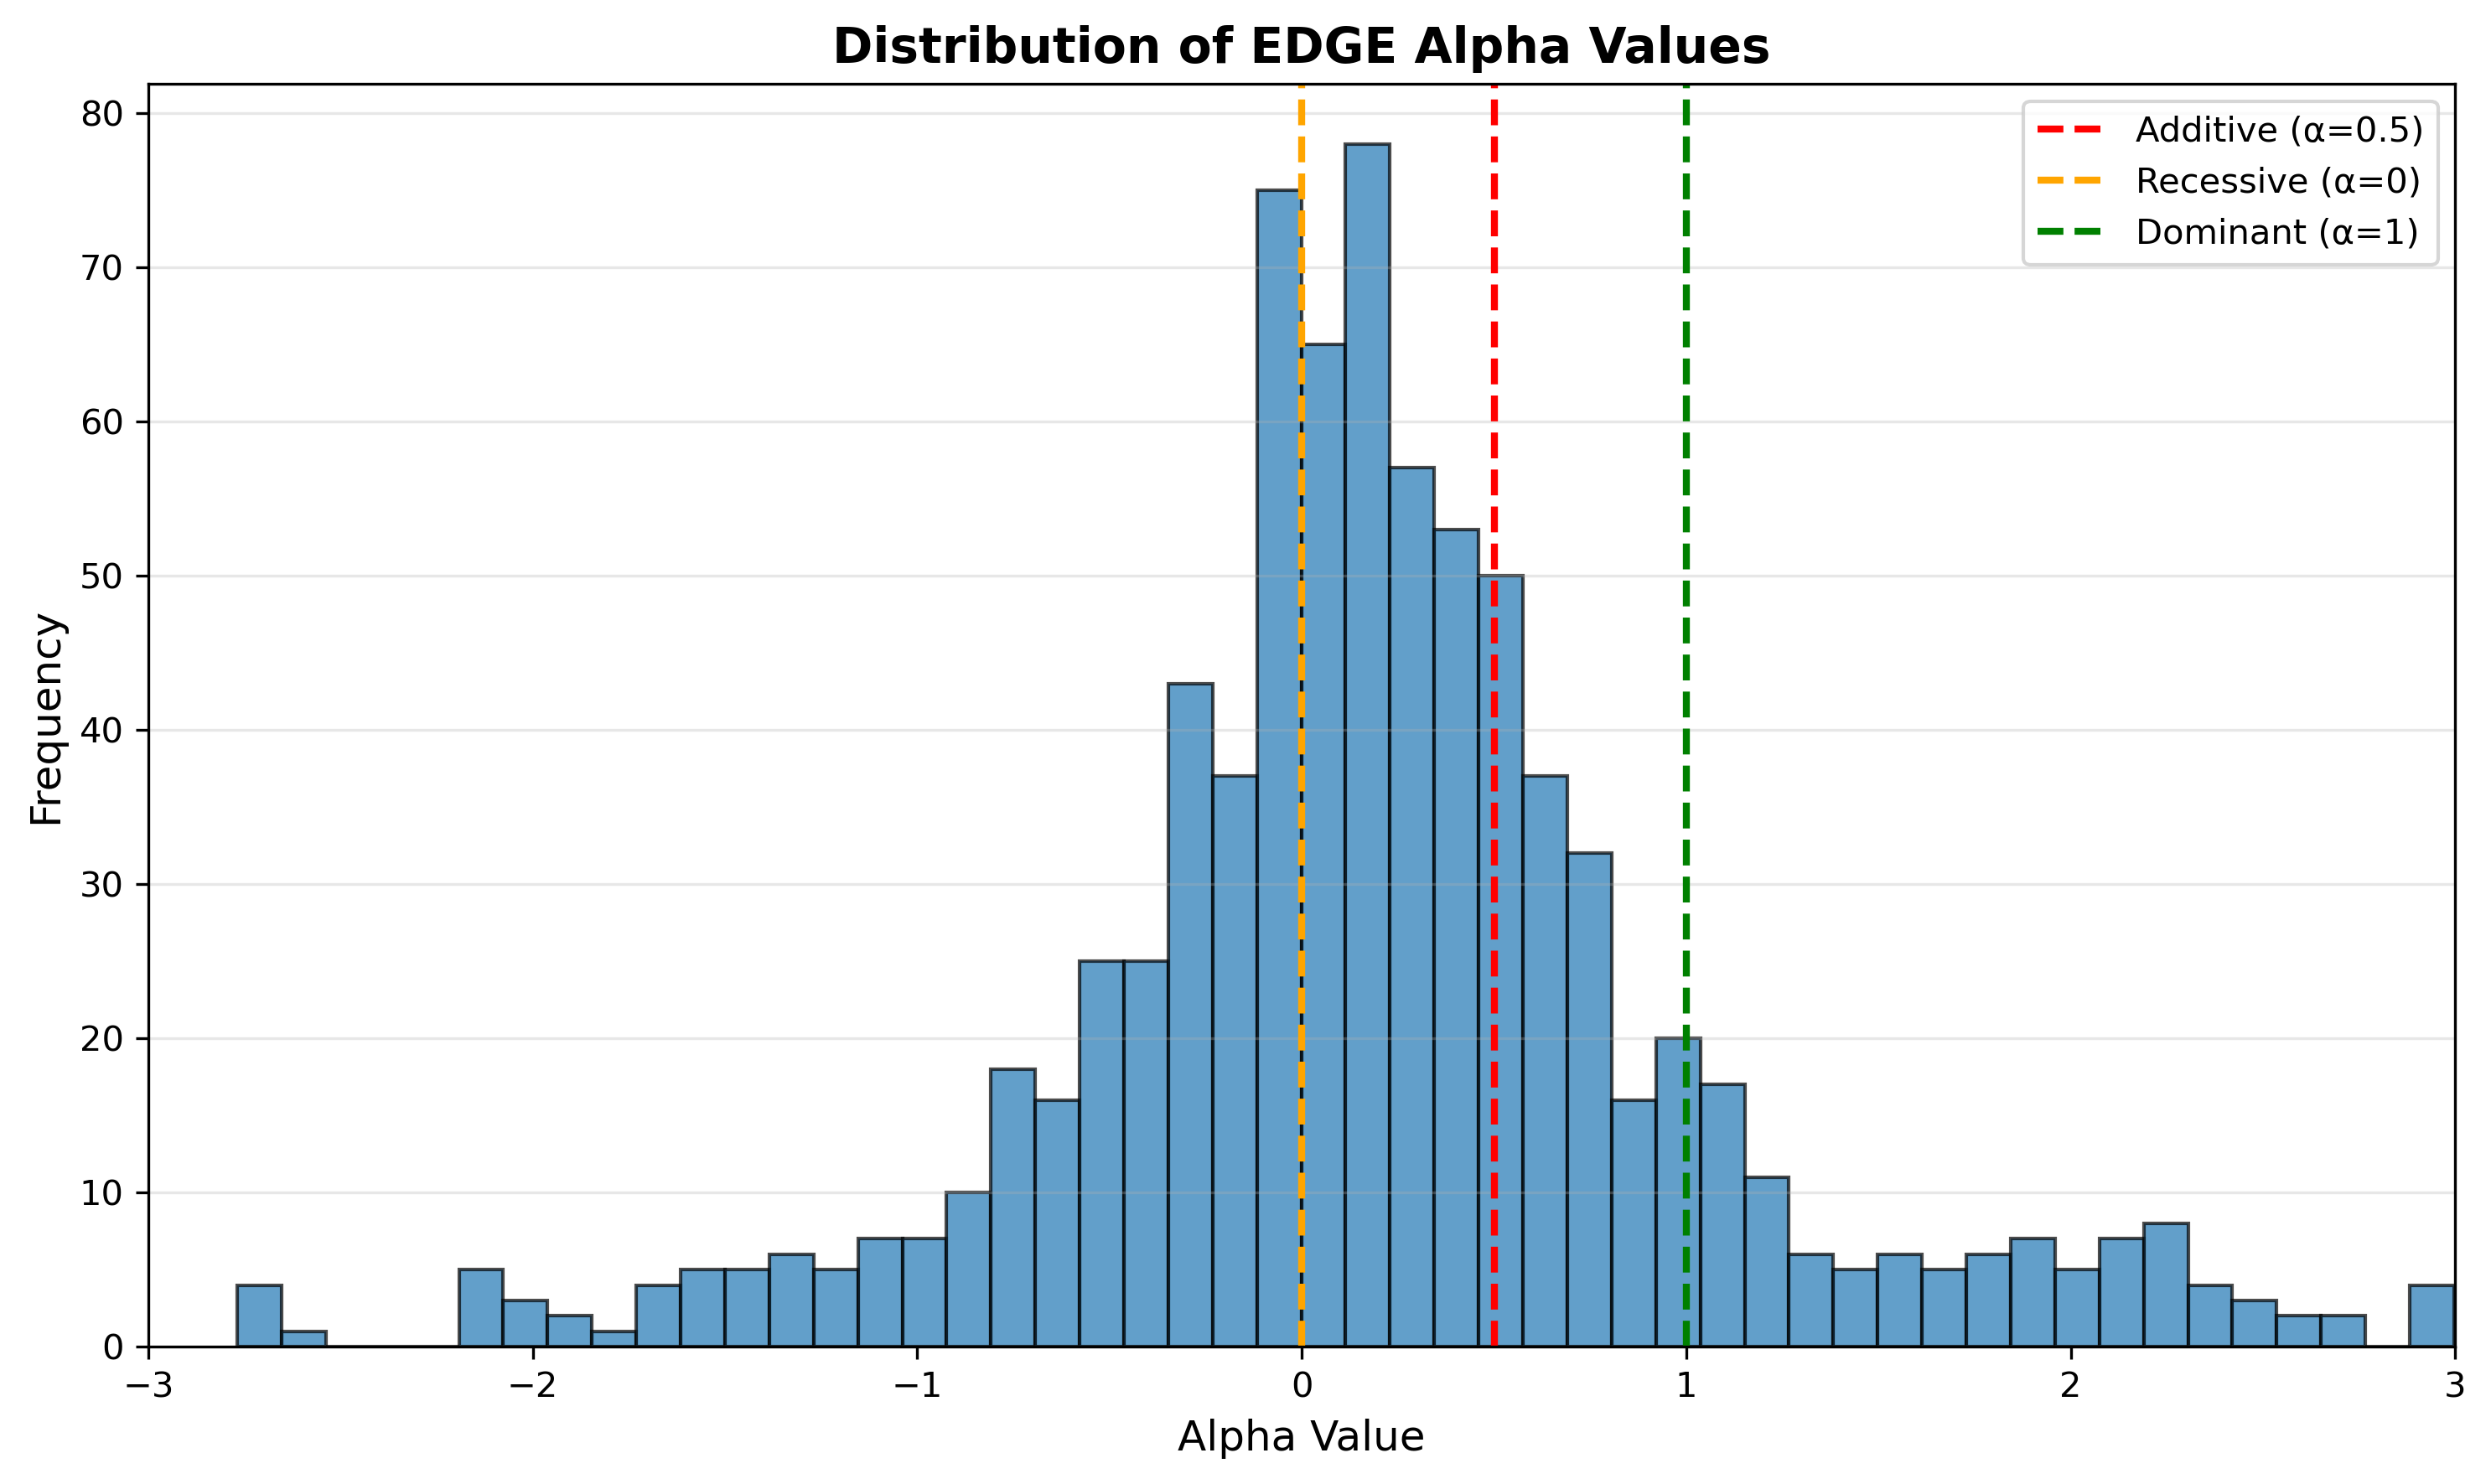

Manhattan plot saved to manhattan.png


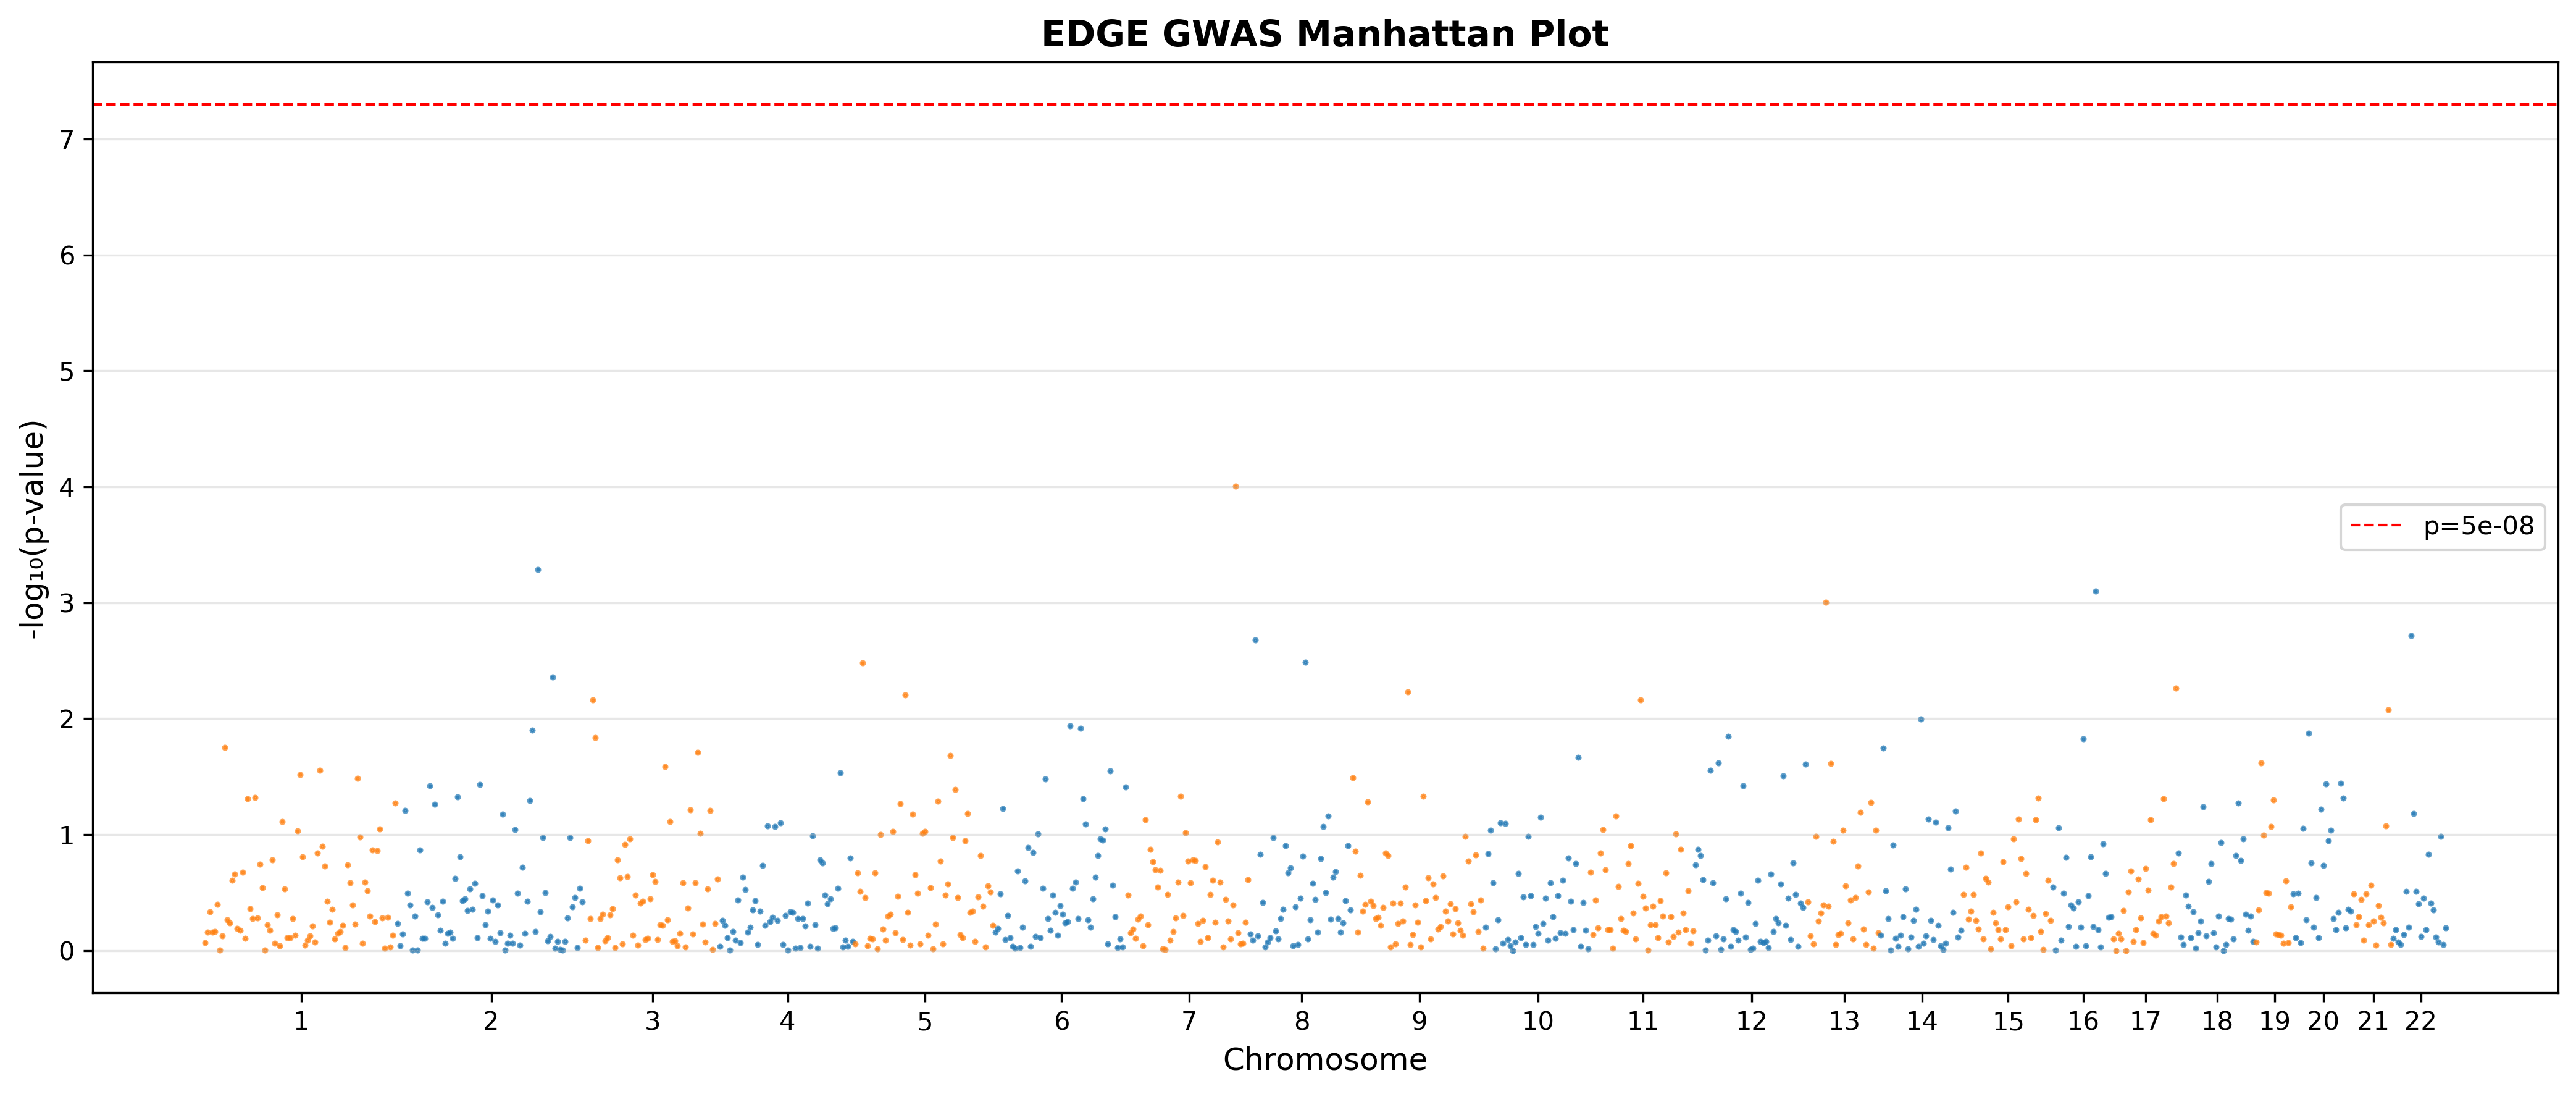

QQ plot saved to qq.png
Genomic inflation factor (λ): 1.111
Lambda GC: 1.111


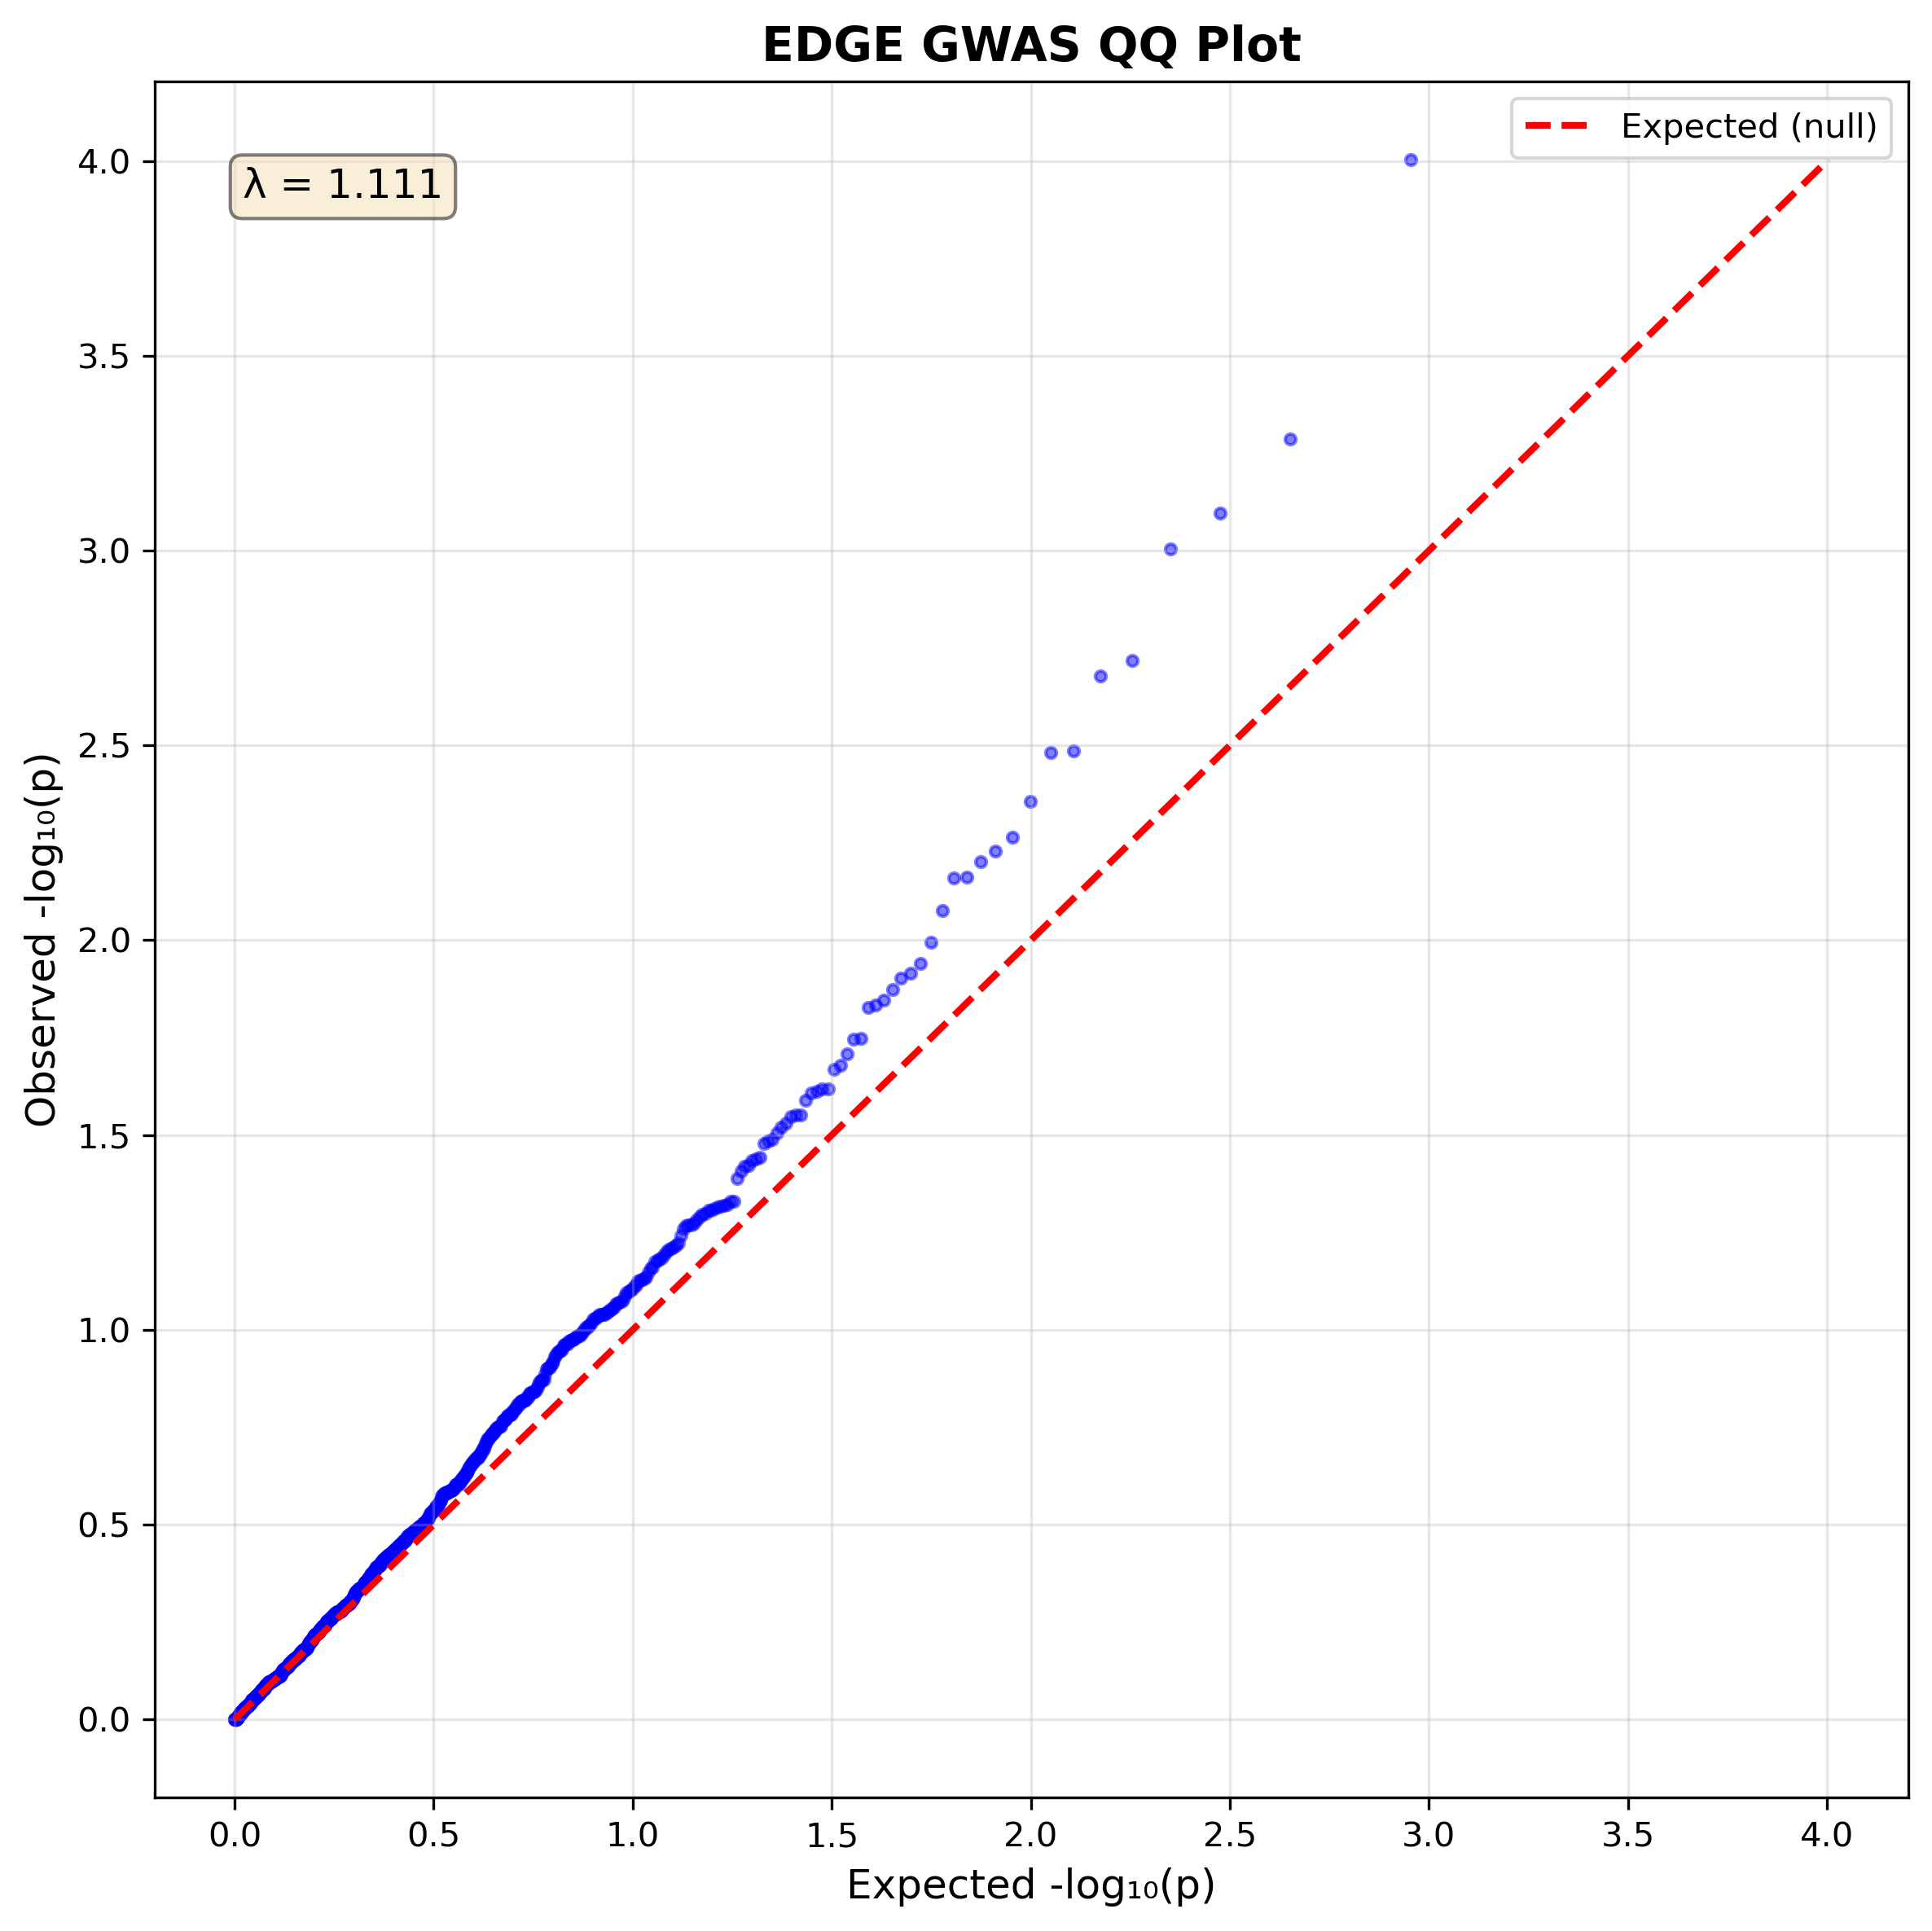

In [16]:
# Cell 15: Visualize with alpha distribution, gwas results in manhattan plot, and genetic inflation in qq plot
alpha_distribution = plot_alpha_distribution(alpha_df, 'alpha.png', xlim=(-3,3))
display(Image('alpha.png'))

manhattan_plot(gwas_df, 'manhattan.png')
display(Image('manhattan.png'))

lambda_gc = qq_plot(gwas_df, 'qq.png')
print(f"Lambda GC: {lambda_gc:.3f}")
display(Image('qq.png'))